# Parada Antecipada - `early-stopping`

É uma técnica de regularização usada em deep learning para prevenir overfitting, monitorando o desempenho do modelo em um conjunto de validação durante o treinamento e interrompendo o treinamento quando o desempenho começa a degradar.

Isso ajuda a evitar que o modelo aprenda ruídos nos dados de treinamento e melhora sua capacidade de generalizar para dados não vistos.

### Como funciona em deep learning?

* **Divisão Treinamento-Validação**: O conjunto de dados é tipicamente dividido em conjuntos de treinamento e validação. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de validação é usado para monitorar o desempenho do modelo durante o treinamento.

* **Monitoramento da Perda de Validação**: Durante o treinamento, o desempenho do modelo no conjunto de validação é monitorado avaliando uma métrica de perda (por exemplo, perda de entropia cruzada, erro quadrático médio) ou outras métricas de avaliação (por exemplo, acurácia, F1 score). A perda de validação é calculada após cada época de treinamento ou após um certo número de lotes de treinamento.

* **Critérios de Parada Antecipada**: Um parâmetro de paciência é definido, especificando o número de épocas a esperar antes de interromper o treinamento se não houver melhoria na perda de validação. Se a perda de validação não diminuir por um certo número de épocas (definido pelo parâmetro de paciência), o treinamento é interrompido antecipadamente.

* **Checkpointing do Modelo**: Opcionalmente, os pesos do modelo podem ser salvos periodicamente durante o treinamento (por exemplo, após cada época) para capturar o melhor desempenho do modelo no conjunto de validação. Isso permite recuperar o modelo com o melhor desempenho de validação, mesmo que o treinamento seja interrompido antecipadamente.

* **Interrompendo o Treinamento**: Quando a perda de validação não melhora por um número especificado de épocas (definido pelo parâmetro de paciência), o treinamento é interrompido antecipadamente, e o modelo com a menor perda de validação é mantido.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
inputs, target = make_circles(n_samples = 500, noise = 0.1, random_state = 42)

<Axes: >

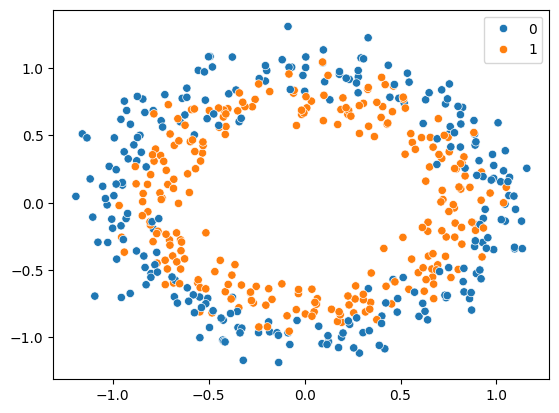

In [3]:
sns.scatterplot(x = inputs[:,0], y= inputs[:,1], hue = target)

In [18]:
train_input, test_input, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [19]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
history = model.fit(train_input, train_target, validation_split = 0.2, epochs = 100, verbose = 2)

Epoch 1/100
10/10 - 2s - 154ms/step - accuracy: 0.5156 - loss: 0.6978 - val_accuracy: 0.4375 - val_loss: 0.7035
Epoch 2/100
10/10 - 0s - 35ms/step - accuracy: 0.5094 - loss: 0.6928 - val_accuracy: 0.4625 - val_loss: 0.6916
Epoch 3/100
10/10 - 0s - 10ms/step - accuracy: 0.5406 - loss: 0.6889 - val_accuracy: 0.5250 - val_loss: 0.6862
Epoch 4/100
10/10 - 0s - 14ms/step - accuracy: 0.5250 - loss: 0.6867 - val_accuracy: 0.5625 - val_loss: 0.6834
Epoch 5/100
10/10 - 0s - 15ms/step - accuracy: 0.5219 - loss: 0.6851 - val_accuracy: 0.6000 - val_loss: 0.6828
Epoch 6/100
10/10 - 0s - 16ms/step - accuracy: 0.5531 - loss: 0.6834 - val_accuracy: 0.6375 - val_loss: 0.6821
Epoch 7/100
10/10 - 0s - 23ms/step - accuracy: 0.5406 - loss: 0.6821 - val_accuracy: 0.6125 - val_loss: 0.6795
Epoch 8/100
10/10 - 0s - 13ms/step - accuracy: 0.5312 - loss: 0.6809 - val_accuracy: 0.5875 - val_loss: 0.6775
Epoch 9/100
10/10 - 0s - 14ms/step - accuracy: 0.5625 - loss: 0.6785 - val_accuracy: 0.6750 - val_loss: 0.6779


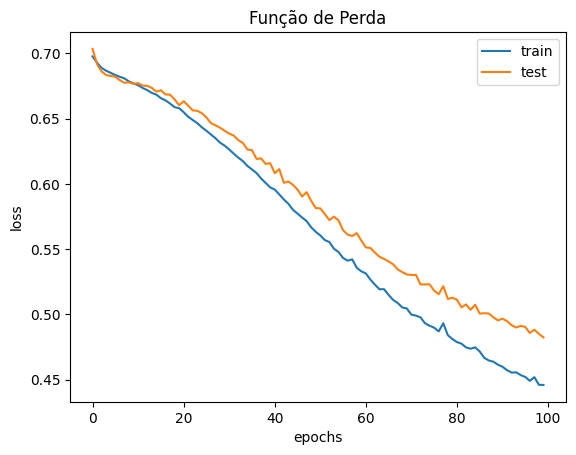

In [22]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.title("Função de Perda")
plt.xlabel("epochs")  # Nome do eixo X
plt.ylabel("loss")  # Nome do eixo Y
plt.legend()
plt.show()


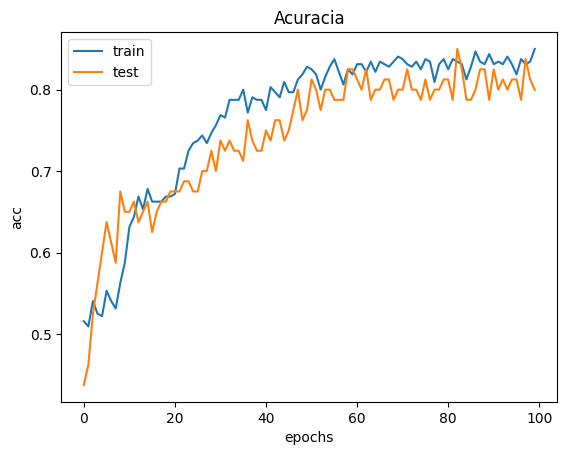

In [24]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="test")
plt.title("Acuracia")
plt.xlabel("epochs")  # Nome do eixo X
plt.ylabel("acc")  # Nome do eixo Y
plt.legend()
plt.show()

In [13]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


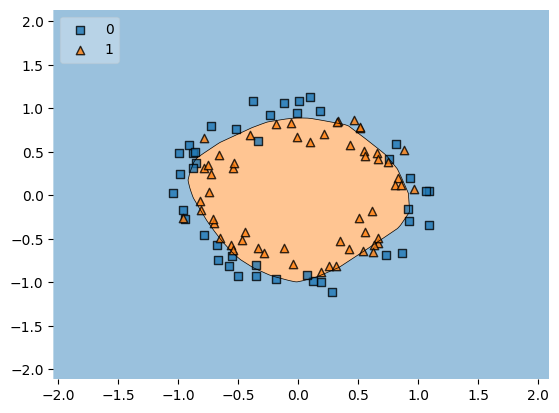

In [14]:
plot_decision_regions(test_input, test_target.ravel(), clf = model, legend=2)
plt.show()

### EarlyStopping class

        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=0,
            patience=0,
            verbose=0,
            mode="auto",
            baseline=None,
            restore_best_weights=False,
            start_from_epoch=0,
        )


**Argumentos:**

* **monitor**: Quantidade a ser monitorada. Padrão é "val_loss".
* **min_delta**: Mudança mínima na quantidade monitorada para qualificar como uma melhoria, ou seja, uma mudança absoluta menor que min_delta será considerada como nenhuma melhoria. Padrão é 0.
* **patience**: Número de épocas sem melhoria após as quais o treinamento será interrompido. Padrão é 0.
* **verbose**: Modo de verbosidade, 0 ou 1. O modo 0 é silencioso, e o modo 1 exibe mensagens quando o callback toma uma ação. Padrão é 0.
* **mode**: Um dos {"auto", "min", "max"}. No modo "min", o treinamento será interrompido quando a quantidade monitorada parar de diminuir; no modo "max", será interrompido quando a quantidade monitorada parar de aumentar; no modo "auto", a direção é inferida automaticamente a partir do nome da quantidade monitorada. Padrão é "auto".
* **baseline**: Valor de referência para a quantidade monitorada. Se não for None, o treinamento será interrompido se o modelo não mostrar melhoria em relação ao valor de referência. Padrão é None.
* **restore_best_weights**: Se deve restaurar os pesos do modelo a partir da época com o melhor valor da quantidade monitorada. Se False, os pesos do modelo obtidos na última etapa do treinamento são usados. Uma época será restaurada independentemente do desempenho em relação ao valor de referência. Se nenhuma época melhorar em relação ao valor de referência, o treinamento será executado por épocas de paciência e restaurará os pesos da melhor época nesse conjunto. Padrão é False.
* **start_from_epoch**: Número de épocas a esperar antes de começar a monitorar a melhoria. Isso permite um período de aquecimento no qual nenhuma melhoria é esperada e, portanto, o treinamento não será interrompido. Padrão é 0.

In [25]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [26]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights=False
)

In [28]:
# lembrando de verbose = 0 não mostra a evolução do treinamento
history = model.fit(train_input, train_target, validation_split = 0.2, epochs = 500, verbose = 0, callbacks=callback)

Epoch 225: early stopping


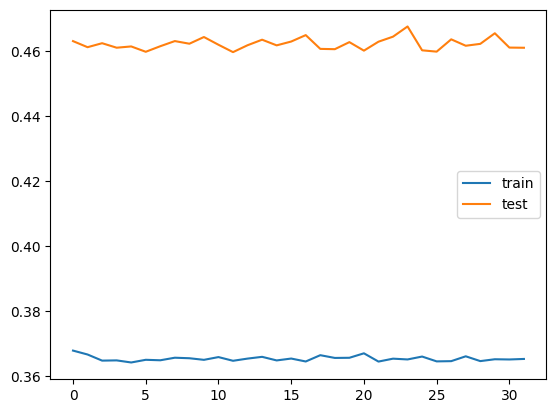

In [ ]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


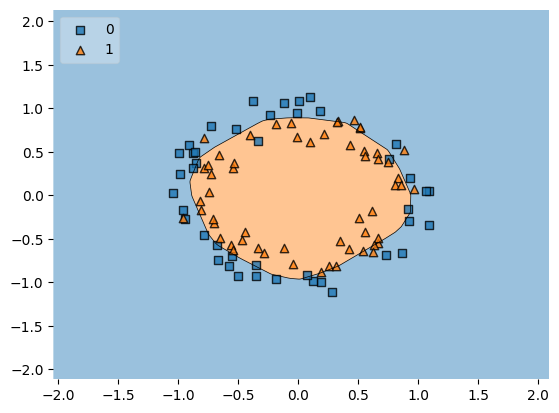

In [ ]:
plot_decision_regions(test_input, test_target.ravel(), clf = model, legend=2)
plt.show()

### Em conclusão,

A parada antecipada ajuda a prevenir o overfitting ao interromper o treinamento quando o desempenho do modelo no conjunto de validação começa a degradar. Isso permite que o modelo generalize melhor para dados não vistos, evitando um ajuste excessivo aos dados de treinamento.
